In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
import pandas as pd

train = pd.read_csv("../data/customer_churn_dataset-train.csv")
test = pd.read_csv("../data/customer_churn_dataset-test.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)


Train Shape: (440833, 12)
Test Shape: (64374, 12)


In [25]:
train.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [26]:
train.tail()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [27]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [28]:
train.isnull().sum()


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

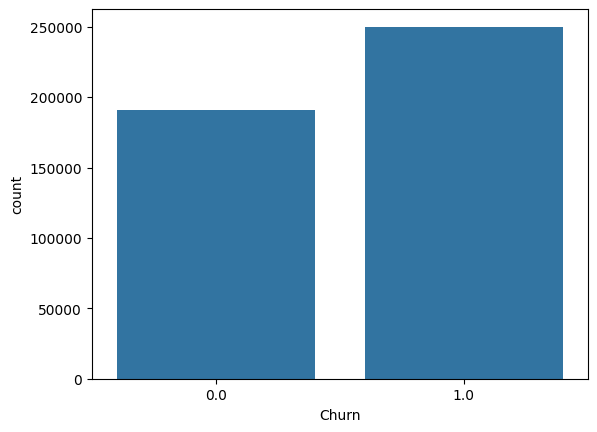

In [29]:
sns.countplot(x='Churn', data=train)
plt.show()


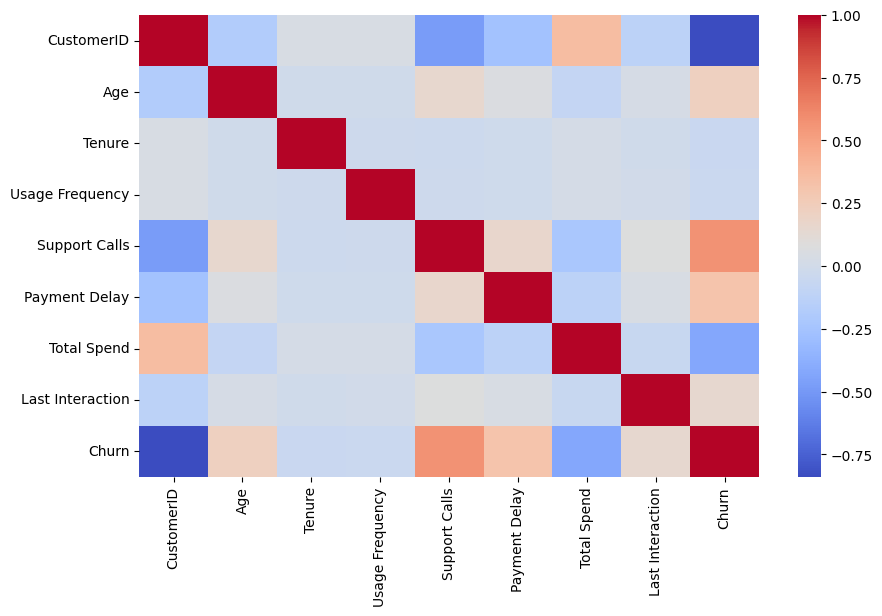

In [30]:
plt.figure(figsize=(10,6))

sns.heatmap(
    train.select_dtypes(include=np.number).corr(),
    cmap="coolwarm",
    annot=False
)

plt.show()


In [31]:
if "CustomerID" in train.columns:
    train.drop("CustomerID", axis=1, inplace=True)

train.dropna(inplace=True)


In [32]:
encoders = {}

for col in train.select_dtypes(include="object").columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    encoders[col] = le


In [33]:
X = train.drop("Churn", axis=1)
y = train["Churn"].astype(int)


In [34]:
X = train.drop("Churn", axis=1)


In [35]:
print(X.columns)


Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')


In [36]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [37]:
rf = RandomForestClassifier(random_state=42)


In [38]:
param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [8, 10, 12],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 5]
}


In [39]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create model
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.999807184093822
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38167
           1       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [41]:
y_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.999807184093822
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38167
           1       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



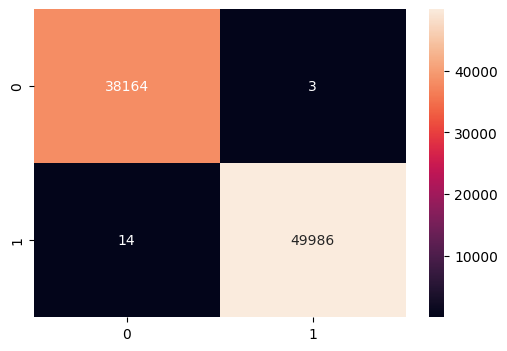

In [42]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [43]:
import joblib   # ← ADD THIS

joblib.dump(model, "../models/churn_model.pkl")
joblib.dump(encoders, "../models/label_encoders.pkl")

print("Production Model Saved")



Production Model Saved


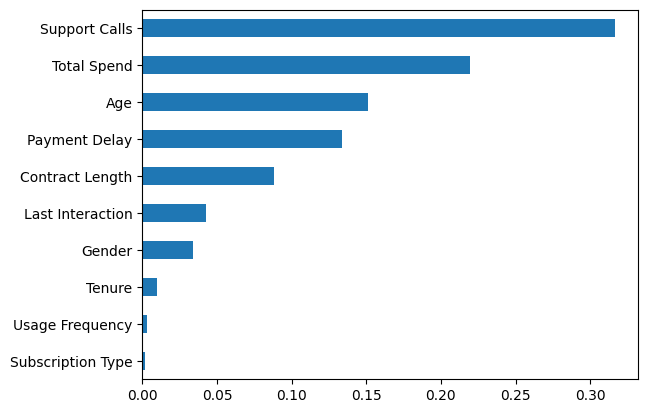

In [44]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh")
plt.show()
